# 1-3. 重回帰分析をしてみよう！
y = intercept_ + coef_[0] * X.RM + coef_[1] * X.LSTAT + 誤差という関係式を考えます。

In [1]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 予測データ（y_pred）をダミーで作成（seedを設定しないと、毎回違う結果になる）
np.random.seed(0)

# ボストン市の住宅価格データ一式
boston = load_boston()  

# 予測の元になる多次元のデータ
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# 予測の対象になる1次元のデータ
y = pd.Series(boston.target, name='MEDV')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box')  # 縦横比を1
    plt.ylabel('y_test(true)')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()])  # 斜め45度の青い線
    plt.plot(y_pred, y, '.') 

In [2]:
from sklearn.linear_model import LinearRegression
%precision 3

'%.3f'

In [4]:
# 線形回帰の作成
lr = LinearRegression()

# フィッティング
lr.fit(X_train, y_train)

# パラメータ（定数項と係数）の確認
lr.intercept_, lr.coef_

(36.980, array([-1.169e-01,  4.399e-02, -5.348e-03,  2.395e+00, -1.563e+01,
         3.761e+00, -6.950e-03, -1.435e+00,  2.398e-01, -1.129e-02,
        -9.866e-01,  8.557e-03, -5.000e-01]))

In [20]:
y_pred = lr.predict(X_test)

#決定係数
score3 = r2_score(y_test, y_pred)
score3

0.635

In [21]:
# 平均二乗誤差
score4 = mean_squared_error(y_test, y_pred)
score4

29.791

(506, 13)

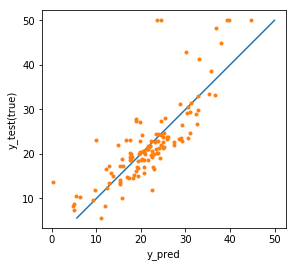

In [14]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box')  # 縦横比を1
    plt.ylabel('y_test(true)')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()])  # 斜め45度の青い線
    plt.plot(y_pred, y, '.') 
    
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)
X.shape

# ロバスト回帰
散布図を見ると、高価格帯で誤差が大きいのがありました。外れ値の影響を減らしたロバスト回帰を試してみましょう。

In [16]:
from sklearn.linear_model import RANSACRegressor

In [17]:
#RANSACの作成
ran = RANSACRegressor(min_samples=int(len(X_train)*0.9),
                      random_state=0)

#フィッティング
ran.fit(X_train, y_train)

# パラメータ（定数項と係数）の確認
ran.estimator_.intercept_, ran.estimator_.coef_

(13.968, array([-0.146,  0.028, -0.038,  1.34 , -7.829,  5.385, -0.034, -0.94 ,
         0.16 , -0.01 , -0.772,  0.013, -0.251]))

In [18]:
# 予測値
y_pred = ran.predict(X_test)
# 決定係数
score = r2_score(y_test, y_pred)
score

0.553

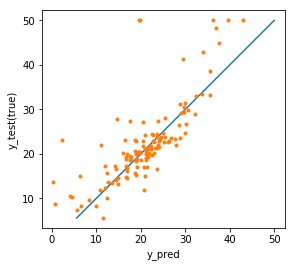

In [19]:
scatter(y_pred, y_test)

ロバスト回帰の手法には、いくつかありますが、ここでは、RANSAC（RAndom SAmple Consensus: sklearn.linear_model.RANSACRegressor）を使います。

RANSACは、ランダムサンプリングに対しパラメーター推定を繰り返し、最も良い推定結果を出します。

基本となるモデルをbase_estimatorオプションで指定できます。省略すると、線形回帰（LinearRegression）になります。
min_samplesオプションで最小サンプル数を指定できます。ここでは、元のデータ数の90%にします。
random_stateオプションを指定して、実行ごとに結果が変わらないようにします。

結果のモデルは、estimator_に入りますので、パラメーターはran.estimator_.intercept_, ran.estimator_.coef_のように確認できます。

決定係数を見ると0.553となり、単純な線形回帰の0.569より若干悪くなりました。
このことから、単純にロバスト回帰をしても、うまくいくとは限らないことがわかります。

今回は、重回帰分析が一番うまくいきましたね！・ω・